In [12]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from datetime import datetime

# Import the API key.
from config import weather_api_key

# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [13]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90., high=90., size=1500)
lngs = np.random.uniform(low=-180., high=180., size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [14]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [15]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [16]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

quatre cocos mu
avarua ck
port alfred za
ust-nera ru
tougan bf
maloshuyka ru
solnechnyy ru
kapaa us
new norfolk au
mataura pf
butaritari ki
hermanus za
tsihombe mg
college us
illoqqortoormiut gl
nova gradiska hr
jamestown sh
hilo us
mataura pf
butaritari ki
pevek ru
khatanga ru
limbang my
taolanaro mg
komsomolskiy ru
busselton au
jonesboro us
busselton au
comodoro rivadavia ar
vao nc
bembereke bj
duz tn
ahipara nz
tiksi ru
ushuaia ar
yarmouth ca
mataura pf
barentsburg sj
sao joao da barra br
busselton au
thompson ca
arraial do cabo br
guerrero negro mx
carbonia it
mataura pf
mar del plata ar
lafia ng
labrea br
rikitea pf
cabo san lucas mx
punta arenas cl
talnakh ru
qandala so
bajo baudo co
abu kamal sy
jamestown sh
vaini to
sindor ru
dhidhdhoo mv
namatanai pg
mastic beach us
rikitea pf
illoqqortoormiut gl
torbay ca
new norfolk au
mahajanga mg
ushuaia ar
thompson ca
cherskiy ru
roebourne au
amderma ru
tasiilaq gl
saint-francois gp
rikitea pf
rikitea pf
east london za
saint-philippe re
a

pollachi in
haibowan cn
sosnovo-ozerskoye ru
busselton au
chokurdakh ru
shcholkine ua
albany au
adrar dz
mataura pf
airai pw
sao joao da barra br
vaini to
cape town za
nizwa om
illoqqortoormiut gl
ushuaia ar
brindisi it
gizo sb
hilo us
albany au
nanortalik gl
kaitangata nz
ushuaia ar
mahajanga mg
lagoa pt
sandy bay hn
roald no
rikitea pf
saint-pierre pm
hasaki jp
fairbanks us
vaini to
chokurdakh ru
victoria sc
hilo us
bredasdorp za
hermanus za
mataura pf
jamestown sh
conyers us
ajdabiya ly
hilo us
masumbwe tz
dikson ru
tasbuget kz
busselton au
palmer us
rikitea pf
mys shmidta ru
rocha uy
gat ly
chokurdakh ru
provideniya ru
butaritari ki
hilo us
bluff nz
thompson ca
saint george bm
mar del plata ar
cape town za
chimore bo
tsihombe mg
busselton au
hobart au
puerto ayora ec
punta arenas cl
rikitea pf
cherskiy ru
atuona pf
barmer in
urengoy ru
ushuaia ar
kilindoni tz
opuwo na
carnarvon au
jamestown sh
busselton au
vila velha br
port alfred za
mataura pf
puerto ayora ec
hermanus za
mys shmi

port alfred za
atuona pf
albany au
arraial do cabo br
saskylakh ru
kapaa us
castro cl
kodiak us
yulara au
khatanga ru
qaanaaq gl
tuktoyaktuk ca
busselton au
mataura pf
lebu cl
barrow us
souillac mu
cayenne gf
new norfolk au
shimanovsk ru
paita pe
khatanga ru
taldan ru
butaritari ki
homer us
busselton au
kadykchan ru
taolanaro mg
busselton au
castro cl
moranbah au
aswan eg
hauterive ca
dikson ru
vardo no
amderma ru
punta arenas cl
marsa ro
marsh harbour bs
hithadhoo mv
bluff nz
upernavik gl
mys shmidta ru
lebu cl
leh in
hermanus za
khonuu ru
ancud cl
rikitea pf
sao joao da barra br
smirnykh ru
namibe ao
eyl so
eyl so
tasiilaq gl
jamestown sh
atuona pf
mehran ir
bambous virieux mu
georgetown sh
castro cl
castro cl
newport us


In [17]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [23]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14d496981f3ab4ab4fbc15adae63ab96


In [24]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | quatre cocos
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | ust-nera
Processing Record 5 of Set 1 | tougan
Processing Record 6 of Set 1 | maloshuyka
City not found. Skipping...
Processing Record 7 of Set 1 | solnechnyy
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 14 of Set 1 | college
Processing Record 15 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 16 of Set 1 | nova gradiska
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | pevek
Processing Record 20 of Set 1 | khatanga
Processing Record 21 of Set 1 |

Processing Record 36 of Set 4 | airai
Processing Record 37 of Set 4 | shaartuz
City not found. Skipping...
Processing Record 38 of Set 4 | ponta do sol
Processing Record 39 of Set 4 | bethel
Processing Record 40 of Set 4 | touros
Processing Record 41 of Set 4 | sompeta
Processing Record 42 of Set 4 | seoul
Processing Record 43 of Set 4 | naberera
Processing Record 44 of Set 4 | tara
Processing Record 45 of Set 4 | loukhi
Processing Record 46 of Set 4 | finca blanco
Processing Record 47 of Set 4 | sao felix do xingu
Processing Record 48 of Set 4 | samalaeulu
City not found. Skipping...
Processing Record 49 of Set 4 | haibowan
City not found. Skipping...
Processing Record 50 of Set 4 | sri aman
Processing Record 1 of Set 5 | portland
Processing Record 2 of Set 5 | kuching
Processing Record 3 of Set 5 | cervo
Processing Record 4 of Set 5 | maloy
Processing Record 5 of Set 5 | moree
Processing Record 6 of Set 5 | soyo
Processing Record 7 of Set 5 | kanchanaburi
Processing Record 8 of Set 5

Processing Record 28 of Set 8 | necochea
Processing Record 29 of Set 8 | sitka
Processing Record 30 of Set 8 | visby
Processing Record 31 of Set 8 | tazmalt
Processing Record 32 of Set 8 | cody
Processing Record 33 of Set 8 | dingle
Processing Record 34 of Set 8 | palora
Processing Record 35 of Set 8 | buin
Processing Record 36 of Set 8 | nome
Processing Record 37 of Set 8 | zhangye
Processing Record 38 of Set 8 | myingyan
Processing Record 39 of Set 8 | skagastrond
City not found. Skipping...
Processing Record 40 of Set 8 | sangmelima
Processing Record 41 of Set 8 | kambove
Processing Record 42 of Set 8 | guiren
Processing Record 43 of Set 8 | port blair
Processing Record 44 of Set 8 | guantanamo
Processing Record 45 of Set 8 | pischia
Processing Record 46 of Set 8 | pisco
Processing Record 47 of Set 8 | general roca
Processing Record 48 of Set 8 | juegang
Processing Record 49 of Set 8 | alofi
Processing Record 50 of Set 8 | fortuna
Processing Record 1 of Set 9 | samarai
Processing Re

Processing Record 15 of Set 12 | sorong
Processing Record 16 of Set 12 | namtsy
Processing Record 17 of Set 12 | turukhansk
Processing Record 18 of Set 12 | louis trichardt
Processing Record 19 of Set 12 | ukiah
Processing Record 20 of Set 12 | xinmin
Processing Record 21 of Set 12 | santa ana huista
Processing Record 22 of Set 12 | hofn
Processing Record 23 of Set 12 | pemangkat
Processing Record 24 of Set 12 | axim
Processing Record 25 of Set 12 | saint anthony
Processing Record 26 of Set 12 | yabassi
Processing Record 27 of Set 12 | flinders
Processing Record 28 of Set 12 | omsukchan
Processing Record 29 of Set 12 | rabo de peixe
Processing Record 30 of Set 12 | umm lajj
Processing Record 31 of Set 12 | grand gaube
Processing Record 32 of Set 12 | ternate
Processing Record 33 of Set 12 | vieques
Processing Record 34 of Set 12 | sioux lookout
Processing Record 35 of Set 12 | kieta
Processing Record 36 of Set 12 | makat
Processing Record 37 of Set 12 | vostok
Processing Record 38 of S

In [25]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Quatre Cocos,-20.2078,57.7625,72.09,79,23,17.20,MU,2021-10-03 16:59:24
1,Avarua,-21.2078,-159.7750,73.45,78,40,9.22,CK,2021-10-03 16:59:25
2,Port Alfred,-33.5906,26.8910,58.06,68,36,11.74,ZA,2021-10-03 16:54:45
3,Ust-Nera,64.5667,143.2000,23.41,92,30,3.18,RU,2021-10-03 16:59:25
4,Tougan,13.0667,-3.0667,97.56,25,22,4.54,BF,2021-10-03 16:59:26
5,Solnechnyy,50.7214,136.6319,35.33,69,48,4.97,RU,2021-10-03 16:59:26
6,Kapaa,22.0752,-159.3190,73.38,82,8,1.99,US,2021-10-03 16:54:32
7,New Norfolk,-42.7826,147.0587,54.75,83,68,1.43,AU,2021-10-03 16:54:52
8,Mataura,-46.1927,168.8643,44.47,93,100,6.22,NZ,2021-10-03 16:54:31
9,Butaritari,3.0707,172.7902,82.62,65,96,15.08,KI,2021-10-03 16:55:06


In [26]:
city_data_df = city_data_df[['City', 'Country', 'Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Quatre Cocos,MU,2021-10-03 16:59:24,-20.2078,57.7625,72.09,79,23,17.20
1,Avarua,CK,2021-10-03 16:59:25,-21.2078,-159.7750,73.45,78,40,9.22
2,Port Alfred,ZA,2021-10-03 16:54:45,-33.5906,26.8910,58.06,68,36,11.74
3,Ust-Nera,RU,2021-10-03 16:59:25,64.5667,143.2000,23.41,92,30,3.18
4,Tougan,BF,2021-10-03 16:59:26,13.0667,-3.0667,97.56,25,22,4.54
5,Solnechnyy,RU,2021-10-03 16:59:26,50.7214,136.6319,35.33,69,48,4.97
6,Kapaa,US,2021-10-03 16:54:32,22.0752,-159.3190,73.38,82,8,1.99
7,New Norfolk,AU,2021-10-03 16:54:52,-42.7826,147.0587,54.75,83,68,1.43
8,Mataura,NZ,2021-10-03 16:54:31,-46.1927,168.8643,44.47,93,100,6.22
9,Butaritari,KI,2021-10-03 16:55:06,3.0707,172.7902,82.62,65,96,15.08


In [47]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [48]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Quatre Cocos,MU,2021-10-03 16:59:24,-20.2078,57.7625,72.09,79,23,17.20
1,Avarua,CK,2021-10-03 16:59:25,-21.2078,-159.7750,73.45,78,40,9.22
2,Port Alfred,ZA,2021-10-03 16:54:45,-33.5906,26.8910,58.06,68,36,11.74
3,Ust-Nera,RU,2021-10-03 16:59:25,64.5667,143.2000,23.41,92,30,3.18
4,Tougan,BF,2021-10-03 16:59:26,13.0667,-3.0667,97.56,25,22,4.54
...,...,...,...,...,...,...,...,...,...
554,Leh,IN,2021-10-03 17:05:31,34.1667,77.5833,53.94,29,26,5.44
555,Smirnykh,RU,2021-10-03 17:03:27,49.7500,142.8333,41.86,95,100,3.60
556,Eyl,SO,2021-10-03 17:03:27,7.9803,49.8164,78.60,85,79,20.83
557,Mehran,IR,2021-10-03 17:03:28,33.1222,46.1646,93.09,11,0,6.69


In [28]:
city_data_df.to_csv('WeatherPy_Database.csv')

In [29]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

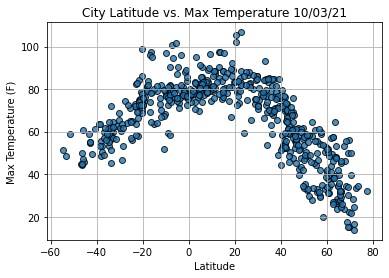

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

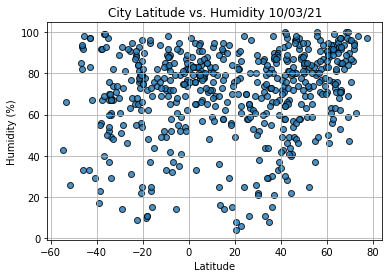

In [31]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig2.png")
# Show plot.
plt.show()

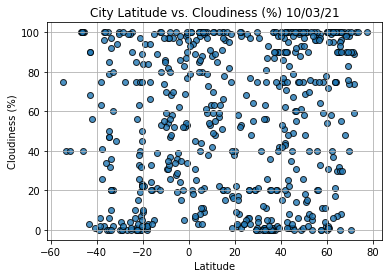

In [32]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig3.png")
# Show plot.
plt.show()

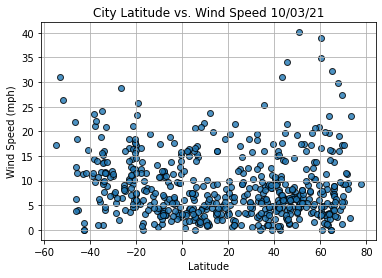

In [33]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig4.png")
# Show plot.
plt.show()

In [34]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [35]:
index13 = city_data_df.loc[13]
index13

City                    Jamestown
Country                        US
Date          2021-10-03 16:52:27
Lat                        42.097
Lng                      -79.2353
Max Temp                    69.94
Humidity                      100
Cloudiness                     90
Wind Speed                   8.05
Name: 13, dtype: object

In [36]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4       True
       ...  
554     True
555     True
556     True
557     True
558     True
Name: Lat, Length: 559, dtype: bool

In [37]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Ust-Nera,RU,2021-10-03 16:59:25,64.5667,143.2000,23.41,92,30,3.18
4,Tougan,BF,2021-10-03 16:59:26,13.0667,-3.0667,97.56,25,22,4.54
5,Solnechnyy,RU,2021-10-03 16:59:26,50.7214,136.6319,35.33,69,48,4.97
6,Kapaa,US,2021-10-03 16:54:32,22.0752,-159.3190,73.38,82,8,1.99
9,Butaritari,KI,2021-10-03 16:55:06,3.0707,172.7902,82.62,65,96,15.08


In [38]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

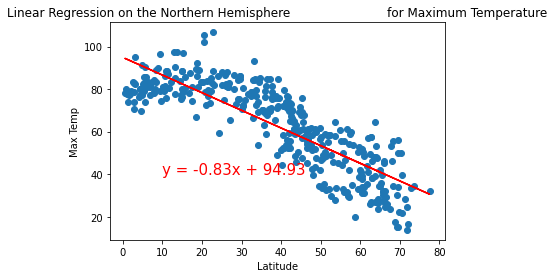

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

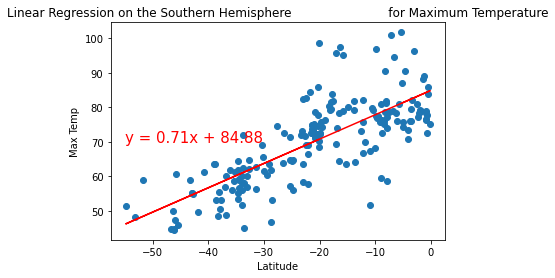

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                        'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-55,70))

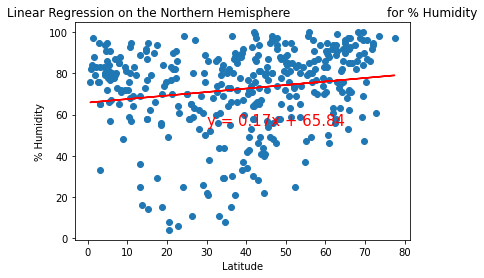

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(30,55))

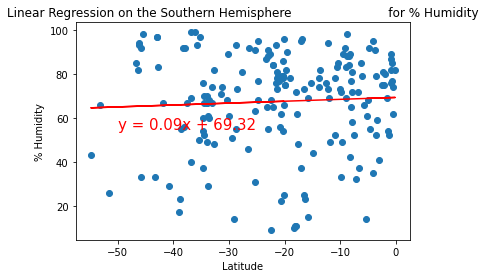

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,55))

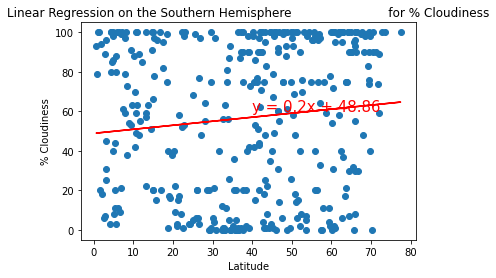

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,60))

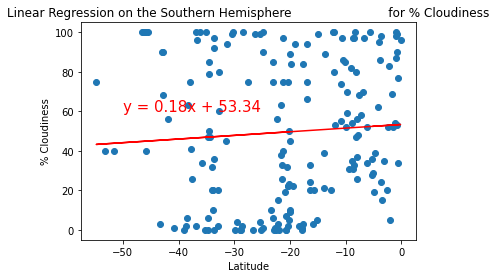

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

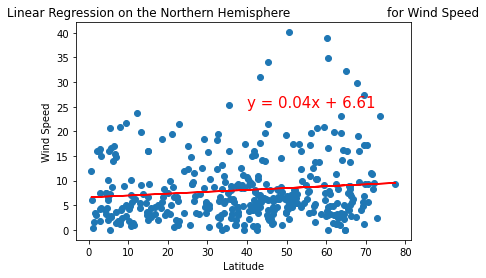

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

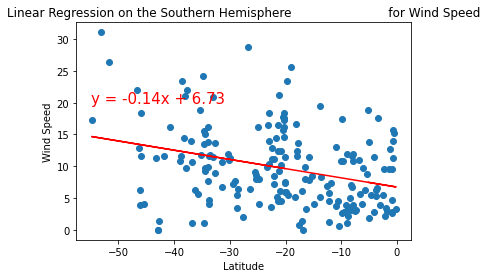

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-55,20))